
<a id='ifp'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Poupança Ótima III: Restrições Ocasionalmente Vinculativas

## Conteúdo

- [Poupança Ótima III: Restrições Ocasionalmente Vinculativas](#Poupança-Ótima-III:-Restrições-Ocasionalmente-Vinculativas)  
  - [Resumo](#Resumo)  
  - [O Problema da Poupança Ótima](#O-Problema-da-Poupança-Ótima)  
  - [Computação](#Computação)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Em seguida, estudaremos um problema de poupança ótima para um consumidor que vive infinitamente — o “ancestral comum” descrito em [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012), seção 1.3.

Esse é um subproblema essencial para muitos modelos macroeconômicos representativos:

- [[Aiy94]](https://julia.quantecon.org/../zreferences.html#aiyagari1994)  
- [[Hug93]](https://julia.quantecon.org/../zreferences.html#huggett1993)  
- etc.  


Está relacionado ao problema de decisão no [modelo de crescimento ótimo estocástico](https://julia.quantecon.org/optgrowth.html) e ainda difere em aspectos importantes.

Por exemplo, o problema de escolha do agente inclui um termo de renda aditiva que leva a uma restrição ocasionalmente vinculativa.

Nossa apresentação do modelo será relativamente breve;

- Para mais detalhes sobre intuição econômica, implicação e modelos, consulte [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012)  
- As provas de todos os resultados matemáticos declarados abaixo podem ser encontradas <a href=/_static/pdfs/pi2.pdf download>nesse documento</a>  


Para resolver o modelo, usaremos a iteração de tempo baseada na equação de Euler, semelhante a [essa aula](https://julia.quantecon.org/coleman_policy_iter.html).

Esse método acaba sendo:

- Globalmente convergente sob suposições suaves, mesmo quando a utilidade é ilimitada (acima e abaixo).
- Mais eficiênte numericamente que a função de valor iteração.  

### Referências

Outras referências usuais incluem [[Dea91]](https://julia.quantecon.org/../zreferences.html#deaton1991), [[DH10]](https://julia.quantecon.org/../zreferences.html#denhaan2010), [[Kuh13]](https://julia.quantecon.org/../zreferences.html#kuhn2013), [[Rab02]](https://julia.quantecon.org/../zreferences.html#rabault2002),  [[Rei09]](https://julia.quantecon.org/../zreferences.html#reiter2009)  e [[SE77]](https://julia.quantecon.org/../zreferences.html#schechtmanescudero1977).

## O Problema da Poupança Ótima

<a id='index-1'></a>
Vamos escrever o modelo e depois dicutir como resolvê-lo.

### Configuração

Considere uma família que escolhe um plano de consumo contingente $ \{c_t\}_{t \geq 0} $ para maximizar:

$$
\mathbb{E} \, \sum_{t=0}^{\infty} \beta^t u(c_t)
$$

sujeito a:

<a id='equation-eqst'></a>
$$
c_t + a_{t+1} \leq  Ra_t  + z_t,
\qquad c_t \geq 0,
\qquad a_t \geq -b
\qquad t = 0, 1, \ldots \tag{1}
$$

Aqui:

- $ \beta \in (0,1) $ é o fator de desconto.
- $ a_t $ é a detenção de ativos no momento $ t $, com isso a restrição de emprésticos é $ a_t \geq -b $.  
- $ c_t $ é o consumo.
- $ z_t $ é renda não-capital (salários, seguro desemprego, etc.)  
- $ R := 1 + r $, onde $ r > 0 $ é a taxa de juros da poupança.


A renda não-capital $ \{z_t\} $ é assumida ser um processo de Markov com valores em $ Z\subset (0,\infty) $ com núcleo estocástico $ \Pi $.

Isso significa que $ \Pi(z, B) $ é a probabilidade de que $ z_{t+1} \in
B $ dado $ z_t = z $.

A expectativa de $ f(z_{t+1}) $ dado $ z_t = z $ é escrita como:

$$
\int f( \acute z) \, \Pi(z, d \acute z)
$$

Também assumimos que:

1. $ r > 0 $ e $ \beta R < 1 $.  
1. $ u $ é suave, estritamente crescente e estritamente côncavo com $ \lim_{c \to 0} u'(c) = \infty $ e $ \lim_{c \to \infty} u'(c) = 0 $  


O espaço do ativo é $ [-b, \infty) $ e o estado é o par $ (a,z) \in S := [-b,\infty) \times Z $.

Um *caminho de consumo factível* a partir de $ (a,z) \in S $ é uma sequência de consumo $ \{c_t\} $ de modo que $ \{c_t\} $ e seu caminho de consumo induzido $ \{a_t\} $ satisfaça:

1. $ (a_0, z_0) = (a, z) $  
1. as restrições de viabilidade em [(1)](#equation-eqst), e  
1. a mensurabilidade $ c_t $ w.r.t. a filtragem gerada por $ \{z_1, \ldots, z_t\} $  


O significado do terceiro ponto é justamente esse consumo no momento $ t $ só pode ser uma função de resultados que já foram observados.

### A Função de Valor e a Equação de Euler

A *função de valor* $ V \colon S \to \mathbb{R} $ é definida por:


<a id='equation-eqvf'></a>
$$
V(a, z) := \sup \, \mathbb{E}
\left\{
\sum_{t=0}^{\infty} \beta^t u(c_t)
\right\} \tag{2}
$$

onde o *supremo* está sobre todos os caminhos viáveis de consumo de $ (a,z) $.
Um *caminho de consumo ótimo* a partir de $ (a,z) $ é um caminho de consumo viável a partir de $ (a,z) $ que atinge o *supremo* em [(2)](#equation-eqvf).

Para definir esses caminhos, podemos usar uma versão da equação de Euler, que na configuração atual é:


<a id='equation-ee00'></a>
$$
u' (c_t)
\geq \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] \tag{3}
$$

e


<a id='equation-ee01'></a>
$$
u' (c_t) = \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ]
\quad \text{sempre que }
c_t < Ra_t + z_t + b \tag{4}
$$

Em essência, isso diz que a relação natural de “arbitragem” $ u' (c_t) = \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] $ é válida quando a escolha de consumo atual é interior.

Interioridade significa que $ c_t $ é estritamente menor que seu limite superior $ Ra_t + z_t + b $.

(O caso do limite inferior de $ c_t = 0 $ nunca surge no ótimo porque
$ u'(0) = \infty $)

Quando $ c_t $ atinge o limite superior $ Ra_t + z_t + b $, a desigualdade estrita $ u' (c_t) > \beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] $
pode ocorrer pois $ c_t $ não pode crescer suficientemente para atingir a igualdade.

Com algum pensamento e esforço, pode-se mostrar que [(3)](#equation-ee00) e [(4)](#equation-ee01) são equivalentes a:


<a id='equation-eqeul0'></a>
$$
u' (c_t)
= \max \left\{
\beta R \,  \mathbb{E}_t [ u'(c_{t+1}) ] \,,\;  u'(Ra_t + z_t + b)
\right\} \tag{5}
$$

### Resultados de Otimização

Dados as nossas suposições, é <a href=/_static/pdfs/pi2.pdf download>sabido</a> que:

1. Para cada $ (a,z) \in S $, existe um único caminho possível a partir de $ (a,z) $.  
1. Esse caminho é o único caminho factível a partir de $ (a,z) $ satisfazendo a igualdade de Euler [(5)](#equation-eqeul0) e a condição de transversalidade.



<a id='equation-eqtv'></a>
$$
\lim_{t \to \infty} \beta^t \, \mathbb{E} \, [ u'(c_t) a_{t+1} ] = 0. \tag{6}
$$

Além disso, existe uma *função de consumo ótimo* $ c^* \colon S \to [0, \infty) $ de modo que o caminho a partir de  $ (a,z) $ é gerado por:

$$
(a_0, z_0) = (a, z),
\quad
z_{t+1} \sim \Pi(z_t, dy),
\quad
c_t = c^*(a_t, z_t)
\quad \text{e} \quad
a_{t+1} = R a_t + z_t - c_t
$$

satisfazendo ambos [(5)](#equation-eqeul0) e [(6)](#equation-eqtv), e é portanto o único caminho ótimo a partir de $ (a,z) $.

Em resumo, para resolver o problema de otimização, precisamos computar $ c^* $.


<a id='ifp-computation'></a>

## Computação

<a id='index-2'></a>
Existem duas maneiras padrão de resolver $ c^* $.

1. Iteração no Tempo (TI) usando a igualdade de Euler.  
1. Função de Valor Iteração (VFI)  


Vamos ver isso por sua vez.

### Iteração no Tempo

Podemos reescrever [(5)](#equation-eqeul0) para torná-la uma declaração sobre funções, em vez de variáveis ​​aleatórias.

Em particular, considere a equação funcional:


<a id='equation-eqeul1'></a>
$$
u' \circ c \, (a, z)
= \max \left\{
\gamma \int u' \circ c \, \{R a + z - c(a, z), \, \acute z\}
\, \Pi(z,d \acute z)
\, , \;
     u'(Ra + z + b)
     \right\} \tag{7}
$$

onde $ \gamma := \beta R $ e $ u' \circ c(s) := u'(c(s)) $.

A equação [(7)](#equation-eqeul1) é uma equação funcional em $ c $.

Para identificar uma solução, faça $ \mathscr{C} $ ser o conjunto de funções de consumo candidatas $ c \colon S \to \mathbb R $ de modo que:

- cada $ c \in \mathscr{C} $ é contínuo e (fracamente) crescente. 
- $ \min Z \leq c(a,z) \leq Ra + z + b $ para todo $ (a,z) \in S $.  


Além disso, faça $ K \colon \mathscr{C} \to \mathscr{C} $ ser definido da seguinte forma.

Para um dado $ c\in \mathscr{C} $, o valor $ Kc(a,z) $ é o único $ t \in J(a,z) $ que resolve:


<a id='equation-eqsifc'></a>
$$
u'(t)
= \max \left\{
\gamma \int u' \circ c \, \{R a + z - t, \, \acute z\}
\, \Pi(z,d \acute z)
\, , \;
     u'(Ra + z + b)
     \right\} \tag{8}
$$

onde


<a id='equation-eqbos'></a>
$$
J(a,z) := \{t \in \mathbb{R} \,:\, \min Z \leq t \leq Ra+ z + b\} \tag{9}
$$

Referimos a $ K $ como operador de função política de Coleman [[Col90]](https://julia.quantecon.org/../zreferences.html#coleman1990).

É <a href=/_static/pdfs/pi2.pdf download>sabido</a> que:

- $ K $ é um mapeamento de contração em $ \mathscr{C} $ sob a métrica. 


$$
\rho(c, d) := \| \, u' \circ c - u' \circ d \, \|
    := \sup_{s \in S} | \, u'(c(s))  - u'(d(s)) \, |
 \qquad \quad (c, d \in \mathscr{C})
$$

- A métrica $ \rho $ é completa em $ \mathscr{C} $  
- A Convergência em $ \rho $ implica convergência uniforme em compactos.


Em consequência, $ K $ tem um único ponto fixo $ c^* \in \mathscr{C} $
e $ K^n c \to c^* $ como $ n \to \infty $ para qualquer $ c \in \mathscr{C} $.

Pela definição de $ K $, os pontos fixos de $ K $ em $ \mathscr{C} $ coincidem com as soluções para [(7)](#equation-eqeul1) em $ \mathscr{C} $.

Em particular, <a href=/_static/pdfs/pi2.pdf download>pode ser mostrado</a> que o caminho $ \{c_t\} $
gerado a partir de $ (a_0,z_0) \in S $ usando a função de política $ c^* $ é o único caminho ótimo a partir de $ (a_0,z_0) \in S $.

**TL;DR** A política ideal única pode ser calculada escolhendo qualquer 
$ c \in \mathscr{C} $ e iterando com o operador $ K $ definido em [(8)](#equation-eqsifc).

### Função de Valor Iteração

O operador de Bellman para esse problema é dado por:


<a id='equation-eqbop'></a>
$$
Tv(a, z)
= \max_{0 \leq c \leq Ra + z + b}
\left\{
    u(c) + \beta \int v(Ra + z - c, \acute z) \Pi(z, d \acute z)
\right\} \tag{10}
$$

Temos que ter cuidado com a VFI (ou seja, iterando com
$ T $) nesse cenário pois $ u $ não é assumido como limitado

- De fato, tipicamente ilimitado acima e abaixo - por exemplo, $ u(c) = \log c $.  
- Nesse caso, a teoria DP padrão não se aplica.
- $ T^n v $ não é garantido que convirja para a função de valor para limites arbitrários contínuos $ v $.  


No entanto, sempre podemos tentar a estratégia popular "iterar e ter esperança".

Podemos então verificar o resultado comparando com o produzido pela TI.

Sabe-se que este último converge, como descrito acima.

### Implementação


<a id='index-3'></a>
Aqui está o código para o construtor de um tupla nomeada chamada de `ConsumerProblem` que armazena as primitivas, assim como:

- uma função `T`, que implementa o operador de Bellman $ T $ especificado acima.
- uma função `K`, que implementa o operador de Colleman $ K $ especificado acima.
- Um `initialize`, que gera condições iniciais adequadas para iteração.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using BenchmarkTools, Optim, Parameters, Plots, QuantEcon, Random
using Optim: converged, maximum, maximizer, minimizer, iterations
gr(fmt = :png);

In [3]:
# função de utilidade e utilidade marginal
u(x) = log(x)
du(x) = 1 / x

# modelo
function ConsumerProblem(;r = 0.01,
                         β = 0.96,
                         Π = [0.6 0.4; 0.05 0.95],
                         z_vals = [0.5, 1.0],
                         b = 0.0,
                         grid_max = 16,
                         grid_size = 50)
    R = 1 + r
    asset_grid = range(-b, grid_max, length = grid_size)

    return (r = r, R = R, β = β, b = b, Π = Π, z_vals = z_vals, asset_grid = asset_grid)
end

function T!(cp, V, out; ret_policy = false)

    # descompata, configuração de matrizes
    @unpack R, Π, β, b, asset_grid, z_vals = cp
    z_idx = 1:length(z_vals)

    # função de valor quando o índice de choque é z_i
    vf = interp(asset_grid, V)

    opt_lb = 1e-8

    # resolve para RHS da euqação de Bellman
    for (i_z, z) in enumerate(z_vals)
        for (i_a, a) in enumerate(asset_grid)

            function obj(c)
                EV = dot(vf.(R * a + z - c, z_idx), Π[i_z, :]) # computa a expectativa
                return u(c) +  β * EV
            end
            res = maximize(obj, opt_lb, R .* a .+ z .+ b)
            converged(res) || error("Didn't converge") # importante para verificar

            if ret_policy
                out[i_a, i_z] = maximizer(res)
            else
                out[i_a, i_z] = maximum(res)
            end

        end
    end
    out
end

T(cp, V; ret_policy = false) =
    T!(cp, V, similar(V); ret_policy = ret_policy)

get_greedy!(cp, V, out) =
    update_bellman!(cp, V, out, ret_policy = true)

get_greedy(cp, V) =
    update_bellman(cp, V, ret_policy = true)

function K!(cp, c, out)
    # simplifique nomes, configure matrizes
    @unpack R, Π, β, b, asset_grid, z_vals = cp
    z_idx = 1:length(z_vals)
    gam = R * β

    # função de política quando o índice de choque é z_i
    cf = interp(asset_grid, c)

    # computa lower_bound para a otimização
    opt_lb = 1e-8

    for (i_z, z) in enumerate(z_vals)
        for (i_a, a) in enumerate(asset_grid)
            function h(t)
                cps = cf.(R * a + z - t, z_idx) # c' para cada z'
                expectation = dot(du.(cps), Π[i_z, :])
                return abs(du(t) - max(gam * expectation, du(R * a + z + b)))
            end
            opt_ub = R*a + z + b  # aborda a questão #8 no github
            res = optimize(h, min(opt_lb, opt_ub - 1e-2), opt_ub,
                           method = Optim.Brent())
            out[i_a, i_z] = minimizer(res)
        end
    end
    return out
end

K(cp, c) = K!(cp, c, similar(c))

function initialize(cp)
    # simplifique os nomes, configure matrizes
    @unpack R, β, b, asset_grid, z_vals = cp
    shape = length(asset_grid), length(z_vals)
    V, c = zeros(shape...), zeros(shape...)

    # preenche V e c
    for (i_z, z) in enumerate(z_vals)
        for (i_a, a) in enumerate(asset_grid)
            c_max = R * a + z + b
            c[i_a, i_z] = c_max
            V[i_a, i_z] = u(c_max) / (1 - β)
        end
    end

    return V, c
end

initialize (generic function with 1 method)

Ambos `T` e `K` usam interpolação linear ao longo do *grid* ativo que harmoniza as funções de valor e de consumo.

Os exercícios a seguir orientam você em várias aplicações em que as funções de política são computadas.

No exercício 1, você verá que, embora VFI e TI produzam resultados semelhantes, o último é muito mais rápido.

A intuição por trás desse fato foi fornecida em [uma aula anterior sobre iteração no tempo](https://julia.quantecon.org/coleman_policy_iter.html).

## Exercícios


<a id='ifp-ex1'></a>

### Exercício 1

O primeiro exercício é replicar a figura a seguir, que compara TI e VFI como métodos de solução.

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/caf89a38-5b0c-4856-8831-fb8d02e49aee)
  
A figura mostra políticas de consumo calculadas pela iteração de $ K $ e $ T $ respectivamente.

- No caso da iteração com $ T $, a função de valor final é usada para calcular a política observada.


O consumo é mostrado em função dos ativos com receita $ z $ mantido fixo em seu menor valor.

Os seguintes detalhes são necessários para replicar a figura:

- Os parâmetros são os parâmetros padrão na definição de `consumerProblem`.  
- As condições iniciais são as padrão de `initialize(cp)`.  
- Ambos os operadores são iterados 80 vezes.


Ao executar seu código, você observará essa iteração com  $ K $ é mais rápida do que a iteração com $ T $.

No console Julia, uma comparação dos operadores pode ser feita da seguinte maneira:

In [4]:
cp = ConsumerProblem()
v, c, = initialize(cp)

([-17.328679513998615 0.0; -4.664387247760648 7.125637140580436; … ; 69.82541010621486 70.57937835479346; 70.32526591846735 71.06452735149534], [0.5 1.0; 0.8297959183673469 1.329795918367347; … ; 16.33020408163265 16.83020408163265; 16.66 17.16])

In [5]:
@btime T(cp, v);

  478.959 μs (4676 allocations: 428.20 KiB)


In [6]:
@btime K(cp, c);

  666.756 μs (7925 allocations: 742.17 KiB)



<a id='ifp-ex2'></a>

### Exercício 2

A seguir, vamos considerar como a taxa de juros afeta o consumo.

Reproduza a figura a seguir, que mostra (aproximadamente) políticas ótimas de consumo para diferentes taxas de juros.

![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/fb85252a-29e3-44cf-a1bd-5fd1383b4e85)
  
- Além de r, todos os parâmetros estão com seus valores padrão.
- r passa pelo intervalo (0; 0,04; comprimento = 4).
- O consumo é plotado contra ativos para choque de renda fixado no menor valor.

A figura mostra que taxas de juros mais altas aumentam a poupança e, portanto, suprimem o consumo.

<a id='ifp-ex3'></a>

### Exercício 3

Agora, vamos considerar os níveis de ativos de longo prazo mantidos pelas famílias.

Tomaremos r = 0,03 e usaremos os parâmetros padrão.

A figura a seguir é um diagrama de 45 graus que mostra a lei do movimento de ativos quando o consumo é ideal.

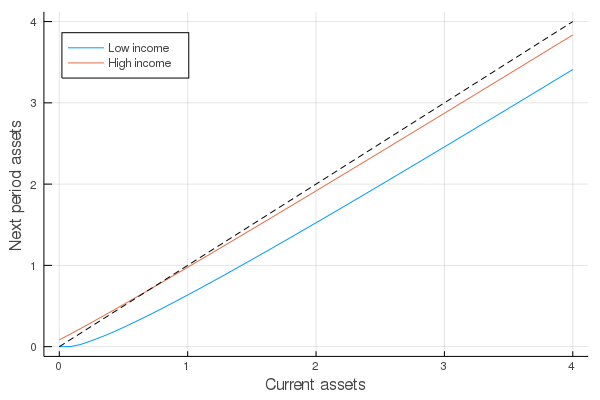

In [7]:
# resolva para o consumo ótimo
m = ConsumerProblem(r = 0.03, grid_max = 4)
v_init, c_init = initialize(m)

c = compute_fixed_point(c -> K(m, c),
                        c_init,
                        max_iter = 150,
                        verbose = false)
a = m.asset_grid
R, z_vals = m.R, m.z_vals

# gera o gráfico da poupança
plot(a, R * a .+ z_vals[1] - c[:, 1], label = "Low income")
plot!(xlabel = "Current assets", ylabel = "Next period assets")
plot!(a, R * a .+ z_vals[2] - c[:, 2], label = "High income")
plot!(xlabel = "Current assets", ylabel = "Next period assets")
plot!(a, a, linestyle = :dash, color = "black", label = "")
plot!(xlabel = "Current assets", ylabel = "Next period assets")
plot!(legend = :topleft)

A linha azul e a laranja representam a função:

$$
a' = h(a, z) := R a + z - c^*(a, z)
$$

quando a renda $ z $ assume valores alto e baixo, respectivamente.

A linha tracejada é a linha de 45 graus.

Podemos ver pela figura que a dinâmica será estável - os ativos não divergem.

De fato, existe uma distribuição estacionária única de ativos que podemos calcular por simulação.

- Pode ser comprovado através do teorema 2 de [[HP92]](https://julia.quantecon.org/../zreferences.html#hopenhaynprescott1992).  
- Representa a dispersão de ativos a longo prazo entre as famílias, quando elas sofrem choques idiossincráticos.


A ergodicidade é válida aqui, portanto, as probabilidades estacionárias podem ser calculadas calculando a média de uma única série longa.

- Portanto, para aproximar a distribuição estacionária, podemos simular uma longa série temporal para ativos e histograma, como na figura a seguir


![3](https://github.com/pluiz30/Julia-Hub/assets/60633407/b1c38572-b625-41e4-a207-fa5d65c75f65)
Sua tarefa é replicar a figura.

- Os parâmetros são como discutidos acima.
- O histograma na figura usou uma única série temporal $ \{a_t\} $ de comprimento 500,000. 
- Dada o comprimento dessa série temporal, a condição inicial  $ (a_0, z_0) $ não importa.
- Você pode achar útil usar o tipo `MarkovChain` desenvolvido por `quantecon`.  



<a id='ifp-ex4'></a>

### Exercise 4

Seguindo os exercícios 2 e 3, vamos ver como as poupanças e os ativos agregados variam com a taxa de juros.

- Nota: [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012) seção 18.6 pode ser consultada para obter mais informações sobre o tópico tratado neste exercício.

Para uma dada parametrização do modelo, a média da distribuição estacionária pode ser interpretada como o capital agregado em uma economia com uma massa unitária de famílias idênticas *ex-ante* choques idiossincráticos.

Vejamos como essa medida de capital agregado varia com a taxa de juros e a restrição de empréstimos.

A figura a seguir plota o capital agregado com a taxa de juros de b em (1, 3).

![4](https://github.com/pluiz30/Julia-Hub/assets/60633407/5bd55e18-8f19-481d-83cc-7835bd08a02c)  
Como é tradicional, o preço (taxa de juros) está no eixo vertical.

O eixo horizontal é o capital agregado calculado como a média da distribuição estacionária.

O Exercício 4 é replicar a figura, usando o código dos exercícios anteriores.

Tente explicar por que a medida do capital agregado é igual a $ -b $
quando $ r=0 $ para ambos os casos mostrados aqui.

## Soluções

### Exercício 1

Starting value function iteration
Starting policy function iteration


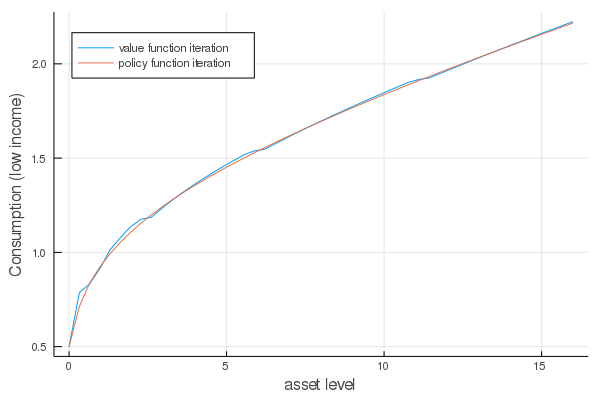

In [8]:
cp = ConsumerProblem()
N = 80

V, c = initialize(cp)
println("Starting value function iteration")
for i in 1:N
    V = T(cp, V)
end
c1 = T(cp, V, ret_policy=true)

V2, c2 = initialize(cp)
println("Starting policy function iteration")
for i in 1:N
    c2 = K(cp, c2)
end

plot(cp.asset_grid, c1[:, 1], label = "value function iteration")
plot!(cp.asset_grid, c2[:, 1], label = "policy function iteration")
plot!(xlabel = "asset level", ylabel = "Consumption (low income)")
plot!(legend = :topleft)

### Exercício 2

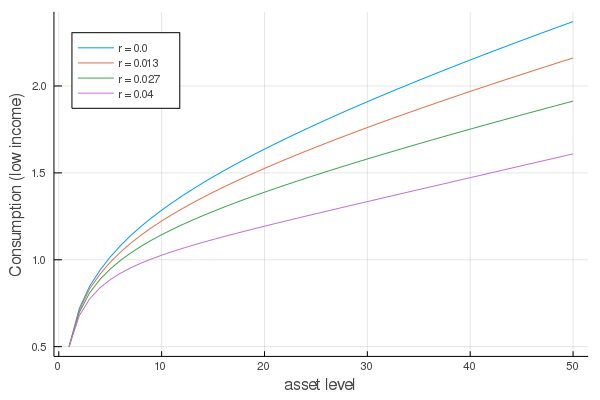

In [9]:
r_vals = range(0, 0.04, length = 4)
traces = []
legends = []

for r_val in r_vals
    cp = ConsumerProblem(r = r_val)
    v_init, c_init = initialize(cp)
    c = compute_fixed_point(x -> K(cp, x),
                            c_init,
                            max_iter = 150,
                            verbose = false)
    traces = push!(traces, c[:, 1])
    legends = push!(legends, "r = $(round(r_val, digits = 3))")
end

plot(traces, label = reshape(legends, 1, length(legends)))
plot!(xlabel = "asset level", ylabel = "Consumption (low income)")
plot!(legend = :topleft)

### Exercício 3

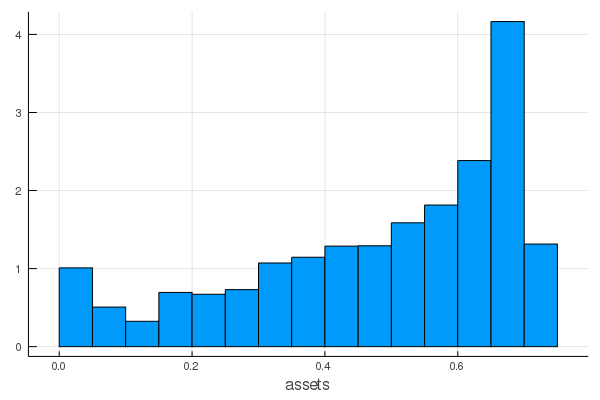

In [10]:
function compute_asset_series(cp, T = 500_000; verbose = false)
    @unpack Π, z_vals, R = cp  # simplify names
    z_idx = 1:length(z_vals)
    v_init, c_init = initialize(cp)
    c = compute_fixed_point(x -> K(cp, x), c_init,
                            max_iter = 150, verbose = false)

    cf = interp(cp.asset_grid, c)

    a = zeros(T + 1)
    z_seq = simulate(MarkovChain(Π), T)
    for t in 1:T
        i_z = z_seq[t]
        a[t+1] = R * a[t] + z_vals[i_z] - cf(a[t], i_z)
    end
    return a
end

cp = ConsumerProblem(r = 0.03, grid_max = 4)
Random.seed!(42) # for reproducibility
a = compute_asset_series(cp)
histogram(a, nbins = 20, leg = false, normed = true, xlabel = "assets")

### Exercício  4

Finished iteration b = 1.0
Finished iteration b = 3.0


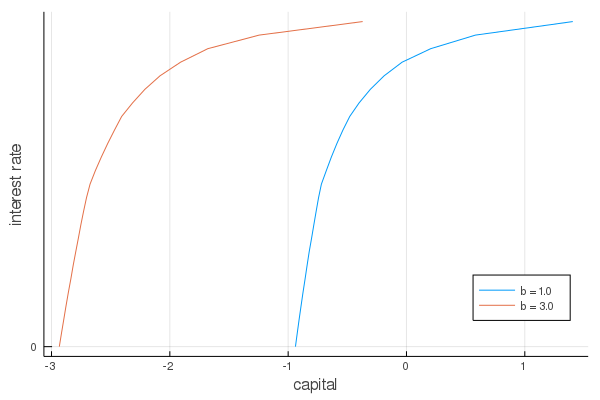

In [11]:
M = 25
r_vals = range(0, 0.04, length = M)

xs = []
ys = []
legends = []
for b in [1.0, 3.0]
    asset_mean = zeros(M)
    for (i, r_val) in enumerate(r_vals)
        cp = ConsumerProblem(r = r_val, b = b)
        the_mean = mean(compute_asset_series(cp, 250_000))
        asset_mean[i] = the_mean
    end
    xs = push!(xs, asset_mean)
    ys = push!(ys, r_vals)
    legends = push!(legends, "b = $b")
    println("Finished iteration b = $b")
end
plot(xs, ys, label = reshape(legends, 1, length(legends)))
plot!(xlabel = "capital", ylabel = "interest rate", yticks = ([0, 0.045]))
plot!(legend = :bottomright)